In [2]:
# Устанавливаю рабочим катологом корень проекта, а не папку notebooks
import os
os.chdir("/mnt/e/Projects/03_Education/PlacentaCancer")

# Функциональный анализ

In [3]:
!pip3 install gseapy seaborn pandas numpy

In [4]:
import pandas as pd
import seaborn as sns
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
tpm = pd.read_csv('data/TPM.csv',na_filter=False)
tpm = tpm[(tpm['Symbol'].notna()) & (tpm['Genetype'] == "protein-coding")]
tpm = tpm.set_index(tpm["Symbol"])

In [6]:
genes_meta = pd.DataFrame(tpm[["Entrez"]], index=tpm['Symbol'])
genes_meta.head()

,Entrez
Symbol,
TSPAN6,7105
TNMD,64102
DPM1,8813
SCYL3,57147
FIRRM,55732


In [7]:
tpm = tpm.drop(columns=['Symbol', 'Entrez', 'Genetype'])
tpm.head()

,male_1,male_2,male_3,male_4,male_5,male_6,female_1,female_2,female_3,female_4,female_5,female_6
Symbol,,,,,,,,,,,,
TSPAN6,653.531374,605.011144,586.019326,592.718112,767.131054,539.472613,1125.907958,752.045777,698.960466,758.434222,564.205501,910.354744
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,1094.437839,930.932475,839.435295,857.620657,1098.726984,863.947699,2820.451462,1237.781051,1165.235773,1172.179747,1186.317109,1542.790409
SCYL3,145.548573,145.330876,205.363400,183.169846,131.378845,133.312800,186.111697,166.230933,146.586877,181.700050,249.241301,144.520039
FIRRM,437.833192,606.633697,310.360004,337.696659,686.432686,513.872872,418.327134,657.443520,555.973489,489.325193,370.459730,394.537331


In [8]:
signatures = {}

with open("data/msigdb_v2024.1.Hs_GMTs/c6.all.v2024.1.Hs.symbols.gmt") as f:
  for line in f.readlines():
    signatures[line.split("\t")[0]] = line.strip().split("\t")[2:]

In [9]:
labels = ['m']*6 + ['f']*6

In [10]:
gs_res = gp.gsea(
    data=tpm,
    gene_sets=signatures.copy(),
    cls=labels,
    min_size=3,
    permutation_type="phenotype",
    permutation_num=1000,
    outdir="gsea",
    method="signal_to_noise"
)

2025-02-23 15:47:21,814 [WARNING] Found duplicated gene names, values averaged by gene names!


/home/alex/miniconda3/lib/python3.12/site-packages/gseapy/gsea.py:173: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


## Результаты

In [11]:
gs_res.res2d = gs_res.res2d.set_index("Term")

In [52]:
p_value = 0.1
significant_results = gs_res.res2d[gs_res.res2d['FDR q-val'] <= p_value]
significant_results

,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
Term,,,,,,,,,
IL2_UP.V1_UP,gsea,0.465569,1.736945,0.003914,0.085757,0.155,76/175,17.10%,TNFRSF12A;LRP8;TLCD3A;FOSL1;LGALSL;TRIB1;POLR1...
IL15_UP.V1_UP,gsea,0.422286,1.716225,0.002008,0.076228,0.193,72/172,20.05%,TNFRSF12A;NOP2;ETV4;LRP8;TLCD3A;FOSL1;LGALSL;T...
PDGF_ERK_DN.V1_DN,gsea,0.39327,1.652291,0.01354,0.095193,0.311,41/142,10.83%,MYC;DHX34;E2F6;PPRC1;ZFP36L2;TFIP11;ADM;TRIB1;...
CSR_EARLY_UP.V1_UP,gsea,0.507686,1.636316,0.046154,0.089545,0.331,56/152,11.77%,TNFRSF12A;PLAUR;FJX1;BCAR3;ELOA;CTPS1;TLNRD1;H...
ESC_J1_UP_EARLY.V1_DN,gsea,0.365859,1.611664,0.024857,0.096138,0.38,37/168,10.13%,MYC;TNFRSF12A;ETV4;SFN;ANGPTL4;SERPINE1;CCN1;R...
BMI1_DN.V1_UP,gsea,0.473401,1.610793,0.039474,0.084637,0.383,62/144,17.86%,FJX1;SLCO2A1;TLCD3A;LCP1;TIMP3;KRT17;F3;EDN1;A...


In [14]:
significant_results.to_csv("data/fa_results.tsv", sep="\t")

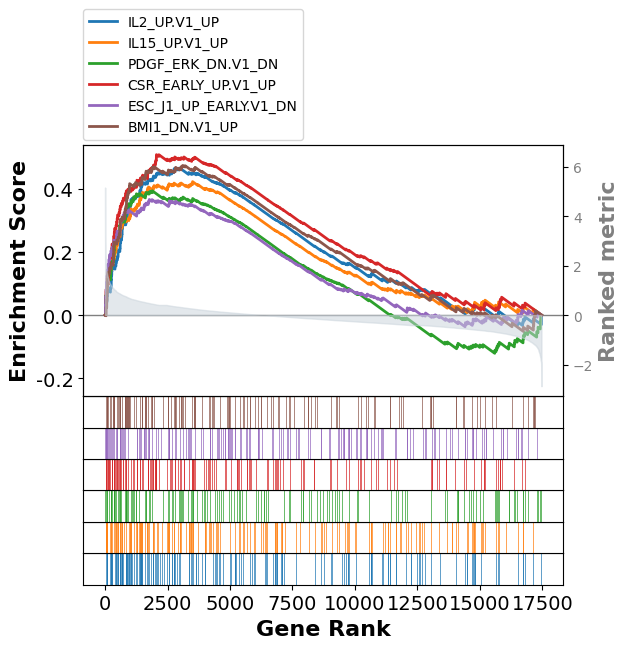

In [15]:
from gseapy import gseaplot, heatmap
terms = significant_results.index
axs = gs_res.plot(terms=terms)

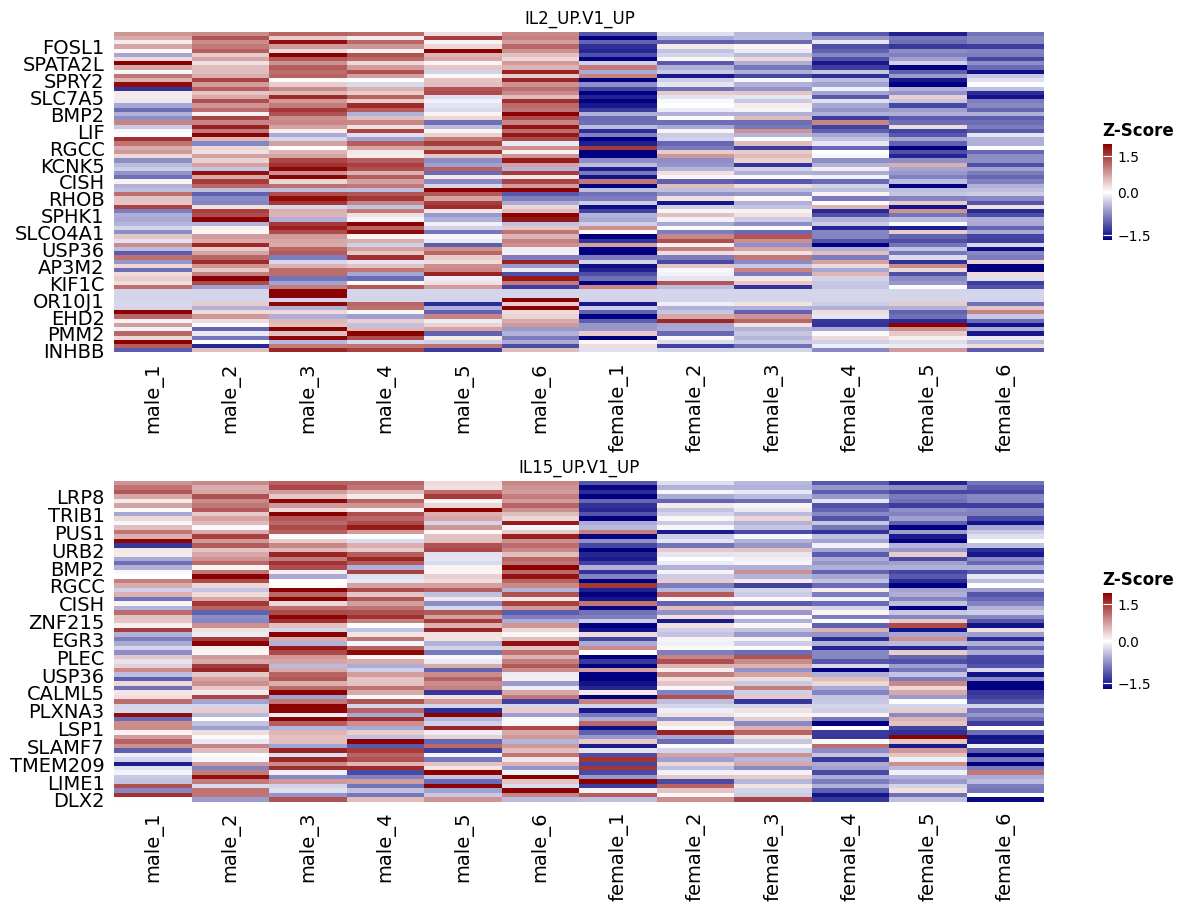

In [68]:
il = ['IL2_UP.V1_UP', 'IL15_UP.V1_UP']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, set in enumerate(il):
    genes = gs_res.res2d.Lead_genes[set].split(";")
    heatmap(
        df=gs_res.heatmat.loc[genes],
        z_score=0,
        ax=ax[i]
    )
    ax[i].set_title(set)

## Согласование с диф. экспрессией

In [17]:
difexpr = pd.read_csv('data/difexpr_resilts.csv', index_col=0)
difexpr.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
DPM1,1230.225798,-0.602103,0.223078,-2.699069,0.006953,0.069019
FGR,16.834385,-2.085569,0.711830,-2.929871,0.003391,0.043863
RAD52,110.113538,0.879861,0.259922,3.385100,0.000712,0.015339
HS3ST1,56.041453,1.592901,0.514016,3.098929,0.001942,0.030520
CFLAR,689.892833,0.713372,0.195957,3.640450,0.000272,0.008130


In [18]:
def vlcn_plot(
    difexpr_df,
    title: str,
    add_labels_to=lambda df: df
):
    # === Фильтрация NaN значений ===
    df = difexpr_df.dropna(subset=["log2FoldChange", "padj"]).copy()

    # === Добавляем колонку -log10(p.adj) ===
    df["logP"] = -np.log10(df["padj"])

    # === Определяем статус гена по порогам ===
    def classify_gene(row):
        if row["padj"] < 0.1 and row["log2FoldChange"] > 0.5:
            return "Upregulated"
        elif row["padj"] < 0.1 and row["log2FoldChange"] < -0.5:
            return "Downregulated"
        return "Not Significant"

    df["Significance"] = df.apply(classify_gene, axis=1)

    # === Отбираем топ-10 по значимости (по наименьшему p.adj) ===
    top_genes = add_labels_to(df)

    # === Настройка графика ===
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x="log2FoldChange", y="logP", hue="Significance",
                    palette={"Upregulated": "red", "Downregulated": "blue", "Not Significant": "gray"},
                    alpha=0.7, edgecolor=None)

    # === Подписываем топ-10 генов ===
    for _, row in top_genes.iterrows():
        plt.text(row["log2FoldChange"], row["logP"], row.name, 
                fontsize=10, ha='right' if row["log2FoldChange"] > 0 else 'left')

    # === Добавляем пороговые линии ===
    plt.axhline(-np.log10(0.1), linestyle="dashed", color="black")  # Линия по p.adj
    plt.axvline(0.5, linestyle="dashed", color="black")   # log2FC = 0.5
    # plt.axvline(-0.5, linestyle="dashed", color="black")  # log2FC = -0.5

    # === Оформление ===
    plt.title(title)
    plt.xlabel("log2 Fold Change")
    plt.ylabel("-log10 Adjusted P-value")
    plt.legend(title="Gene Regulation", loc="upper right")
    plt.grid(True, linestyle="--", alpha=0.5)

    # === Выводим график ===
    plt.show()

### IL2

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, TNFRSF12A to HEG1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   baseMean        31 non-null     float64
 1   log2FoldChange  31 non-null     float64
 2   lfcSE           31 non-null     float64
 3   stat            31 non-null     float64
 4   pvalue          31 non-null     float64
 5   padj            31 non-null     float64
dtypes: float64(6)
memory usage: 1.7+ KB


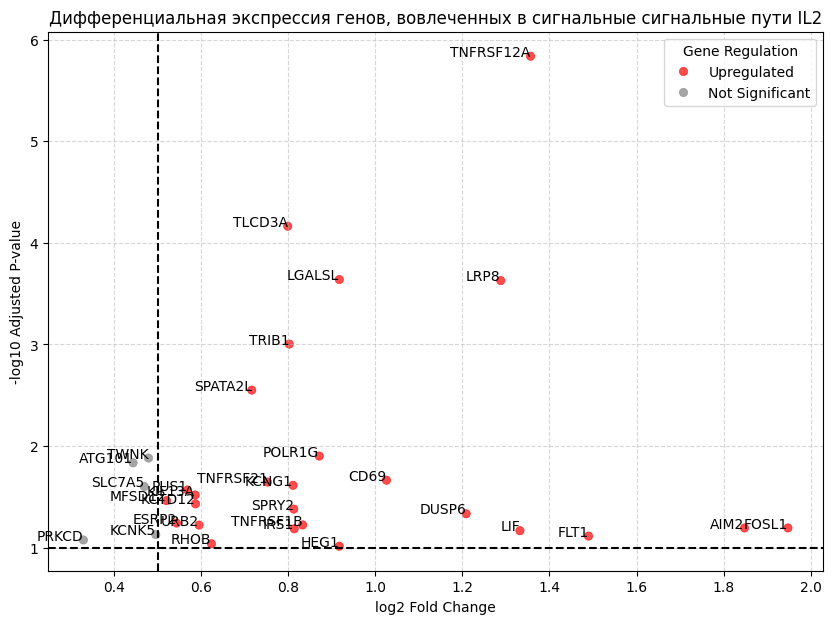

In [20]:
il2_lead_genes = significant_results['Lead_genes']['IL2_UP.V1_UP'].split(";")
il2_difexpr = difexpr[difexpr.index.isin(il2_lead_genes)].sort_values(by='pvalue', ascending=True)
il2_difexpr.info()
vlcn_plot(
    il2_difexpr,
    "Дифференциальная экспрессия генов, вовлеченных в сигнальные сигнальные пути IL2"
)

### IL15

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, TNFRSF12A to HEG1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   baseMean        27 non-null     float64
 1   log2FoldChange  27 non-null     float64
 2   lfcSE           27 non-null     float64
 3   stat            27 non-null     float64
 4   pvalue          27 non-null     float64
 5   padj            27 non-null     float64
dtypes: float64(6)
memory usage: 1.5+ KB


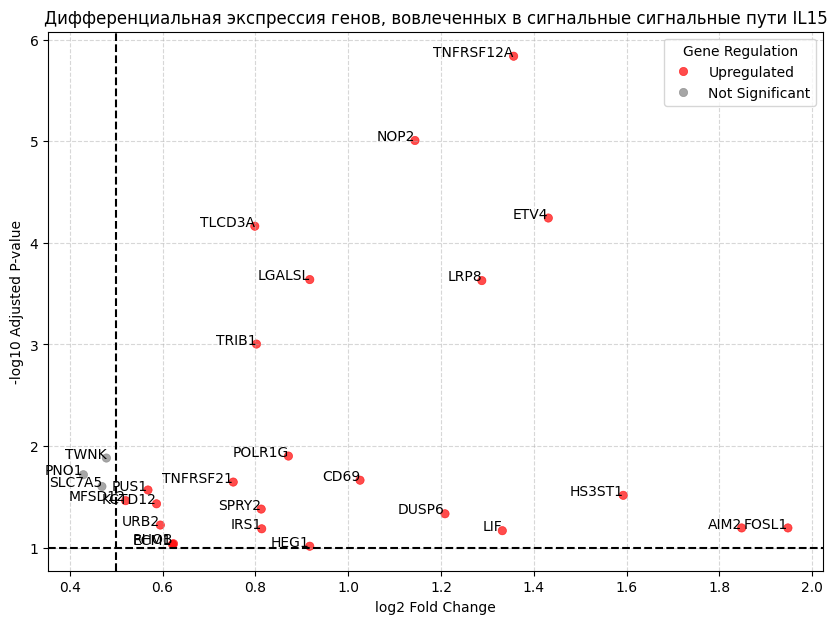

In [21]:
il15_lead_genes = significant_results['Lead_genes']['IL15_UP.V1_UP'].split(";")
il15_difexpr = difexpr[difexpr.index.isin(il15_lead_genes)].sort_values(by='pvalue', ascending=True)
il15_difexpr.info()
vlcn_plot(
    il15_difexpr,
    "Дифференциальная экспрессия генов, вовлеченных в сигнальные сигнальные пути IL15"
)

### IL2 + IL15

In [22]:
il_de = difexpr[difexpr.index.isin(il2_lead_genes) | difexpr.index.isin(il15_lead_genes)]

In [23]:
def classify_pathway(gene):
    if gene in il2_lead_genes and gene in il15_lead_genes:
        return 'Both'
    elif gene in il2_lead_genes:
        return '2'
    elif gene in il15_lead_genes:
        return '15'
    return '-'
il_de['IL'] = [ classify_pathway(g) for g in il_de.index]

/tmp/ipykernel_481/425360685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il_de['IL'] = [ classify_pathway(g) for g in il_de.index]


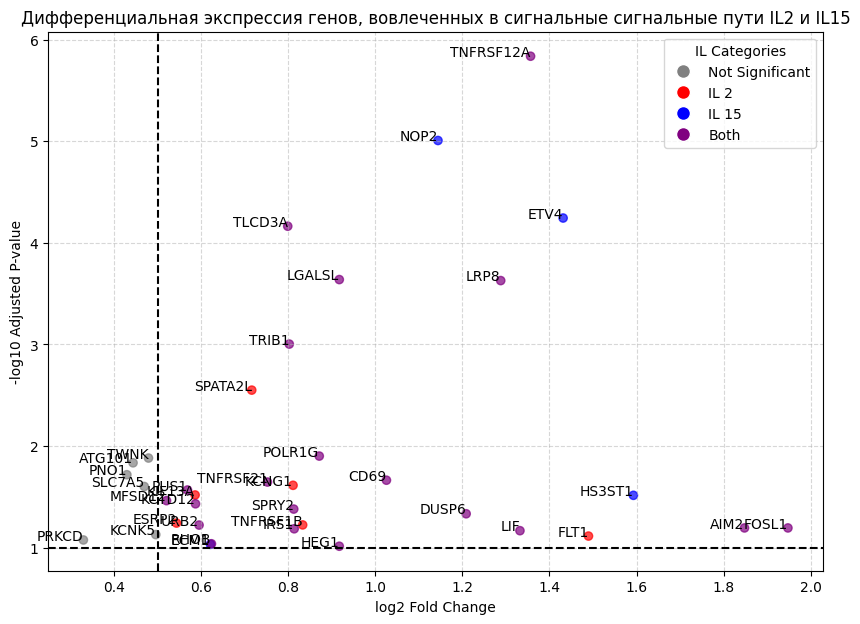

In [24]:
df = il_de.dropna(subset=["log2FoldChange", "padj", "IL"]).copy()

# === Фильтрация NaN значений ===
df = df.dropna(subset=["log2FoldChange", "padj", "IL"]).copy()

# === Добавляем колонку -log10(p.adj) ===
df["logP"] = -np.log10(df["padj"])

# === Определяем статус гена по порогам ===
def classify_gene(row):
    if row["padj"] < 0.1 and abs(row["log2FoldChange"]) > 0.5:
        return True
    return False

df["Significance"] = df.apply(classify_gene, axis=1)

# === Определение цвета по IL ===
color_dict = {"2": "red", "15": "blue", "Both": "purple", "-": "green"}
df["Color"] = df["IL"].map(color_dict)
df.loc[-df['Significance'], 'Color'] = "grey"

top_genes = df

# === Настройка графика ===
plt.figure(figsize=(10, 7))

# === Рисуем все точки ===
plt.scatter(df["log2FoldChange"], df["logP"], c=df["Color"], alpha=0.7, edgecolor=None)

# === Подписываем топ-10 генов ===
for _, row in top_genes.iterrows():
    plt.text(row["log2FoldChange"], row["logP"], row.name, 
             fontsize=10, ha='right' if row["log2FoldChange"] > 0 else 'left')

# === Добавляем пороговые линии ===
plt.axhline(-np.log10(0.1), linestyle="dashed", color="black")  # Линия по p.adj
plt.axvline(0.5, linestyle="dashed", color="black")   # log2FC = 0.5

# === Оформление ===
plt.title("Дифференциальная экспрессия генов, вовлеченных в сигнальные сигнальные пути IL2 и IL15")
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10 Adjusted P-value")

# === Добавляем легенду вручную ===
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker="o", color="w", markersize=10, markerfacecolor="gray", label="Not Significant"),
    Line2D([0], [0], marker="o", color="w", markersize=10, markerfacecolor="red", label="IL 2"),
    Line2D([0], [0], marker="o", color="w", markersize=10, markerfacecolor="blue", label="IL 15"),
    Line2D([0], [0], marker="o", color="w", markersize=10, markerfacecolor="purple", label="Both")
]
plt.legend(handles=legend_elements, title="IL Categories", loc="upper right", fontsize=10, frameon=True)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [25]:
df.loc[-df['Significance'], 'Color'] = "grey"